In [1]:
# %load /Users/akimtsvigun/Anaconda/tools/basic_imports.py
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np

from tqdm import tqdm_notebook as tqdm
import re
import matplotlib.pyplot as plt

#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"


In [2]:
# %load /Users/akimtsvigun/Anaconda/tools/logreg_imports.py
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, fbeta_score, accuracy_score, recall_score, precision_score, roc_auc_score
from sklearn.decomposition import PCA

In [3]:
data = load_iris()
X = data['data']
y = data['target']

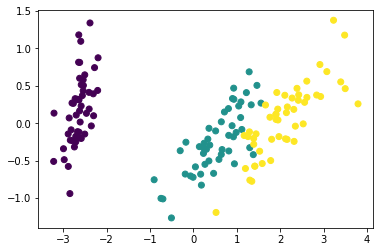

In [4]:
pca = PCA(2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)

In [5]:
y_new = y.copy()
y_new[y_new == 2] = 0

In [6]:
random_indices = np.random.choice(np.arange(len(X)), size=len(X), replace=False)
X_sorted = X[random_indices]
y_new_sorted = y_new[random_indices]

X_train, X_test, y_train, y_test = train_test_split(X_sorted, y_new_sorted, test_size=0.2, shuffle=False)

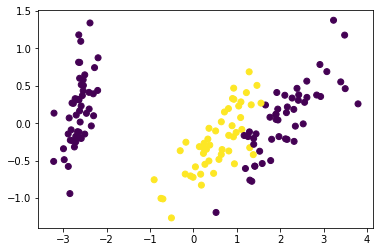

In [7]:
pca = PCA(2)
X_pca = pca.fit_transform(X_sorted)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_new_sorted)

In [8]:
logreg = LogisticRegression().fit(X_train, y_train)
pred_test = logreg.predict(X_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [9]:
for class_metric in [accuracy_score, recall_score, precision_score, f1_score]:
    print(class_metric.__name__, class_metric(y_test, pred_test).round(5))

accuracy_score 0.6
recall_score 0.18182
precision_score 0.4
f1_score 0.25


In [10]:
y_new_2 = y.copy()
y_new_2[y_new_2 == 2] = 1

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y_new_2, test_size=0.7, shuffle=True, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
pred_test = logreg.predict(X_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [12]:
for class_metric in [accuracy_score, recall_score, precision_score, f1_score]:
    print(class_metric.__name__, class_metric(y_test, pred_test).round(5))

accuracy_score 1.0
recall_score 1.0
precision_score 1.0
f1_score 1.0


In [13]:
roc_auc_score(y_test, pred_test)

1.0

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
pred_test = logreg.predict(X_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [15]:
print(f'accuracy: {accuracy_score(y_test, pred_test):.4f}')
for average_type in ['micro', 'macro', 'weighted']:
    print(average_type.title())
    for class_metric in [recall_score, precision_score, f1_score]:
        print(class_metric.__name__, class_metric(y_test, pred_test, average=average_type).round(5))

accuracy: 0.9778
Micro
recall_score 0.97778
precision_score 0.97778
f1_score 0.97778
Macro
recall_score 0.97436
precision_score 0.97619
f1_score 0.97432
Weighted
recall_score 0.97778
precision_score 0.97937
f1_score 0.97774
